In [86]:
# Config the model
from langchain_groq import ChatGroq
llm = ChatGroq(
    model='gemma2-9b-it'
)

In [87]:
from langchain_core.tools import tool

@tool
def multiply(a: int, b: int) -> int:
    """
    Multiply two integers
    a (int): The first integer
    b (int): The second integer

    Returns:
        int: product of a and b
    """
    return a*b

@tool
def add(a: int, b: int) -> int:
    """
    add two integers
    a (int): The first integer
    b (int): The second integer

    Returns:
        int: sum of a and b
    """
    return a + b

@tool
def divide(a: int, b: int) -> float:
    """
    divide two integers
    a (int): The numerator
    b (int): The denominator (must not be zero)

    Returns:
        int: divide a and b
    """
    if b == 0:
        raise ValueError("Denominator cannot be zero.")
    return a / b




In [88]:
from langchain_community.tools import DuckDuckGoSearchRun
search = DuckDuckGoSearchRun()

In [22]:
tools = [multiply, add, divide, search]

In [23]:
llm_with_tools = llm.bind_tools(tools)

In [89]:
from langgraph.graph import START, END, StateGraph, MessagesState
from langgraph.prebuilt import ToolNode, tools_condition



In [51]:
def fun1(state: MessagesState):
    user_question = state['messages']
    SYSTEM_PROMPT="You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs."
    input_question = [SYSTEM_PROMPT] + user_question
    response = llm_with_tools.invoke(input_question)
    return {
        'messages': [response]
    }


In [52]:
builder = StateGraph(MessagesState)
builder.add_node("LLM Decision Maker", fun1)
builder.add_node("tools", ToolNode(tools))
builder.set_entry_point("LLM Decision Maker")
builder.add_conditional_edges("LLM Decision Maker", tools_condition,)
builder.add_edge("tools", "LLM Decision Maker")
react_agent = builder.compile()

In [54]:
from langchain_core.messages import HumanMessage
response = react_agent.invoke({'messages': [HumanMessage(content = 'What is the speed of light?Additionally multiply 10 with the answer')]})

/Users/suriyaa/Desktop/Agentic AI/myenv/lib/python3.13/site-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


In [59]:
print(response)

{'messages': [HumanMessage(content='What is the speed of light?Additionally multiply 10 with the answer', additional_kwargs={}, response_metadata={}, id='2e84d9b4-6e45-4c8c-ac71-4214f3b43709'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'q86qtacj1', 'function': {'arguments': '{"query":"speed of light"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 86, 'prompt_tokens': 1470, 'total_tokens': 1556, 'completion_time': 0.156363636, 'prompt_time': 0.049060271, 'queue_time': 0.24734807800000003, 'total_time': 0.205423907}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--4e452216-2716-4da5-97e6-2cd43040b563-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'speed of light'}, 'id': 'q86qtacj1', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1470, 'output_tokens': 86, 'total_tokens': 1556}), ToolMessage(content=

In [60]:
for output in react_agent.stream({'messages': [HumanMessage(content = 'What is the speed of light?Additionally multiply 10 with the answer')]}):
    for key, value in output.items():
        print({key})
        print('_____________________')
        print(value)

{'LLM Decision Maker'}
_____________________
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '8aj2rvk2g', 'function': {'arguments': '{"query":"speed of light"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 86, 'prompt_tokens': 1470, 'total_tokens': 1556, 'completion_time': 0.156363636, 'prompt_time': 0.060638345, 'queue_time': 0.246872674, 'total_time': 0.217001981}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--41b3c892-b80c-4758-beab-dfe00ee826e2-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'speed of light'}, 'id': '8aj2rvk2g', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1470, 'output_tokens': 86, 'total_tokens': 1556})]}


/Users/suriyaa/Desktop/Agentic AI/myenv/lib/python3.13/site-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


{'tools'}
_____________________
{'messages': [ToolMessage(content="Dec 26, 2024 · The speed of light is the rate at which light waves propagate through different materials. In particular, the speed of light in a vacuum is defined as exactly 299,792,458 … Jan 8, 2025 · Light travels at a constant speed of 299,792,458 metres per second (approximately 300,000 kilometres per second or 186,000 miles per second). This speed is denoted by the … May 23, 2025 · The idea that light speed is the ultimate speed limit raises profound philosophical questions. It challenges our notions of absolute time and space, suggesting that reality is far … Jun 22, 2025 · The speed of light, a cornerstone of physics, continues to fascinate and challenge our understanding of the universe. Albert Einstein's theory of special relativity establishes the … Apr 14, 2025 · The speed of light is approximately 186,282 miles per second. This speed is a universal constant, playing a crucial role in various areas of physics

{'messages': 
    [HumanMessage(content='What is the speed of light?Additionally multiply 10 with the answer', additional_kwargs={}, response_metadata={}, id='2e84d9b4-6e45-4c8c-ac71-4214f3b43709'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'q86qtacj1', 'function': {'arguments': '{"query":"speed of light"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 86, 'prompt_tokens': 1470, 'total_tokens': 1556, 'completion_time': 0.156363636, 'prompt_time': 0.049060271, 'queue_time': 0.24734807800000003, 'total_time': 0.205423907}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--4e452216-2716-4da5-97e6-2cd43040b563-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'speed of light'}, 'id': 'q86qtacj1', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1470, 'output_tokens': 86, 'total_tokens': 1556}), ToolMessage(content='No good DuckDuckGo Search Result was found', name='duckduckgo_search', id='2db40f5c-9f3e-4061-86e4-c2ecebd31eee', tool_call_id='q86qtacj1'), AIMessage(content='The speed of light is approximately 299,792,458 meters per second. \n\n10 multiplied by the speed of light is 2,997,924,580.  \n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 52, 'prompt_tokens': 1556, 'total_tokens': 1608, 'completion_time': 0.094545455, 'prompt_time': 0.065152109, 'queue_time': 0.246246762, 'total_time': 0.159697564}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--ec407ee7-b0fe-4be1-aca4-d39b3b887b88-0', usage_metadata={'input_tokens': 1556, 'output_tokens': 52, 'total_tokens': 1608})]
}

In [61]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is the speed of light?Additionally multiply 10 with the answer
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (q86qtacj1)
 Call ID: q86qtacj1
  Args:
    query: speed of light
================================= Tool Message =================================
Name: duckduckgo_search

No good DuckDuckGo Search Result was found
================================== Ai Message ==================================

The speed of light is approximately 299,792,458 meters per second. 

10 multiplied by the speed of light is 2,997,924,580.


In [81]:
import yfinance as yf
from langchain_community.tools.yahoo_finance_news import YahooFinanceNewsTool

@tool
def get_stock_price(ticker:str)->str:
    """
    Fetches the previous closing price of a given stock ticker from Yahoo Finance.

    Args:
        ticker (str): The stock ticker symbol (e.g., 'AAPL', 'TSLA', 'NIFTY.BO').

    Returns:
        str: A message with the stock's previous closing price.
    """
    try:
        stock = yf.Ticker(ticker)
        price = stock.info.get('previousClose')
        if price is None:
            return f"Could not fetch price for ticker '{ticker}'."
        return f"The last closing price of {ticker.upper()} was ${price:.2f}."
    except Exception as e:
        return f"An error occurred while fetching stock data: {str(e)}"


In [90]:
tools = [multiply, add, divide, search, get_stock_price]

In [91]:
llm_with_tools = llm.bind_tools(tools)
response = llm_with_tools.invoke(f'What is the stock price of Apple computers')

In [94]:
builder = StateGraph(MessagesState)
builder.add_node("LLM Decision Maker", fun1)
builder.add_node("tools", ToolNode(tools))
builder.set_entry_point("LLM Decision Maker")
builder.add_conditional_edges("LLM Decision Maker", tools_condition,)
builder.add_edge("tools", "LLM Decision Maker")
react_agent = builder.compile()

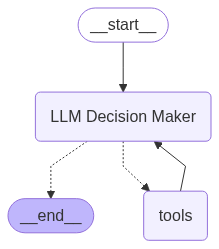

In [84]:
from IPython.display import display, Image
display(Image(react_agent.get_graph().draw_mermaid_png()))

In [99]:
response = react_agent.invoke({"messages":['what is age of Indian Prime Minister Shri Narendra Mode ? Give me an answer multiplying the number with 2']})

/Users/suriyaa/Desktop/Agentic AI/myenv/lib/python3.13/site-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
/Users/suriyaa/Desktop/Agentic AI/myenv/lib/python3.13/site-packages/httpcore/_trace.py:12: ResourceWarning: unclosed database in <sqlite3.Connection object at 0x17533aa70>
  def __init__(


In [100]:
response

{'messages': [HumanMessage(content='what is age of Indian Prime Minister Shri Narendra Mode ? Give me an answer multiplying the number with 2', additional_kwargs={}, response_metadata={}, id='e967e881-1aa7-4691-b462-1e6ba5936424'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'fbdbbfat7', 'function': {'arguments': '{"query":"age of Narendra Modi"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 87, 'prompt_tokens': 1644, 'total_tokens': 1731, 'completion_time': 0.158181818, 'prompt_time': 0.05520911, 'queue_time': 0.25889518899999997, 'total_time': 0.213390928}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--3a000b45-ff41-45c7-afcf-ad8ed5a9fc4d-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'age of Narendra Modi'}, 'id': 'fbdbbfat7', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1644, 'output_tokens

In [101]:
for m in response['messages']:
  m.pretty_print()

================================ Human Message =================================

what is age of Indian Prime Minister Shri Narendra Mode ? Give me an answer multiplying the number with 2
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (fbdbbfat7)
 Call ID: fbdbbfat7
  Args:
    query: age of Narendra Modi
================================= Tool Message =================================
Name: duckduckgo_search

v t e Narendra Damodardas Modi[a](born 17 September 1950) is an Indian politician who has served as the prime minister of Indiasince 2014. Modi was the chief minister of Gujaratfrom 2001 to 2014 … Narendra Modi, an Indian Politician and the 14th Prime Minister of India. Check this page to read Narendra Modi's Biography- his age, wife, caste, career, childhood, family & much more Narendra Damodardas Modi was born on Sunday, 17 September 1950 (age 74 years; as of 2024) in Vadnagar, Bombay State (now Gujarat), India. H